In [1]:
"""Examine different sampling for FFT"""

'Examine different sampling for FFT'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from common.fft import fft_1d, ifft_1d, fft_2d, ifft_2d, sinc_function_1d, sinc_function_2d
from common.utils import step_func_gen

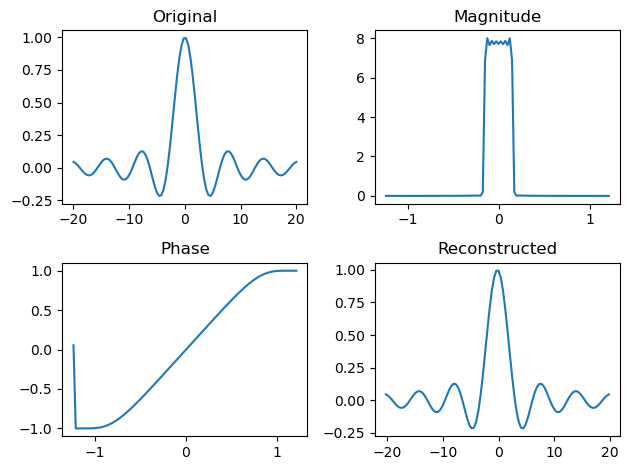

Reconstruction MSE -7.762887554996212e-19


In [3]:
"""Check that 1D sinc function is rectangle function in frequency domain."""

y, x = sinc_function_1d(x_range=(-20, 20), num_samples=100)
ky, kx = fft_1d(y, x)
ry, rx = ifft_1d(ky, kx)

# Note that phase exists when x is even, but not when odd
plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.title("Original")
plt.subplot(2, 2, 2)
plt.plot(kx, np.abs(ky))
plt.title("Magnitude")
plt.subplot(2, 2, 3)
plt.plot(kx, np.tanh(ky.imag / ky.real))
plt.title("Phase")
plt.subplot(2, 2, 4)
plt.plot(rx, ry)
plt.title("Reconstructed")
plt.tight_layout()
plt.show()

print(f"Reconstruction MSE {np.mean(ry - y).sum()}")

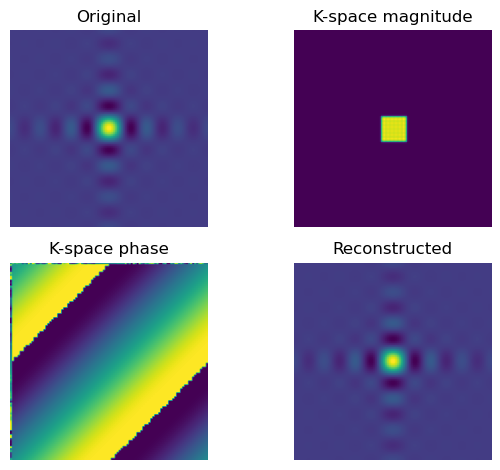

Reconstruction MSE -1.4342978302446518e-20


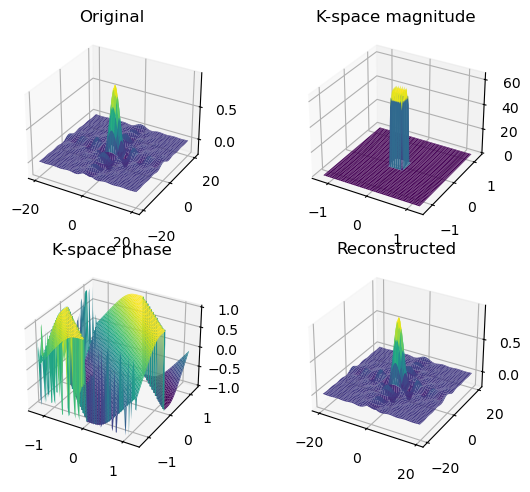

In [4]:
"""Check that 2D sinc function is 2D rectangle function in frequency domain."""

z, x, y = sinc_function_2d(
    x_range=(-20, 20),
    y_range=(-20, 20),
    num_x=100,
    num_y=100,
)
kz, kx, ky = fft_2d(z, x, y)
rz, rx, ry = ifft_2d(kz, kx, ky)

# Note that phase exists when x is even, but not when odd
plt.subplot(2, 2, 1)
plt.imshow(z)
plt.axis("off")
plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(np.abs(kz))
plt.title("K-space magnitude")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(np.tanh(kz.imag / kz.real))
plt.title("K-space phase")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(rz)
plt.title("Reconstructed")
plt.axis("off")
plt.tight_layout()
plt.show()

print(f"Reconstruction MSE {np.mean(rz - z).sum()}")

_, axs = plt.subplots(2, 2, subplot_kw={"projection": "3d"})
axs[0, 0].plot_surface(x, y, z, cmap="viridis")
axs[0, 0].set_title("Original")
axs[0, 1].plot_surface(kx, ky, np.abs(kz), cmap="viridis")
axs[0, 1].set_title("K-space magnitude")
axs[1, 0].plot_surface(kx, ky, np.tanh(kz.imag / kz.real), cmap="viridis")
axs[1, 0].set_title("K-space phase")
axs[1, 1].plot_surface(rx, ry, rz, cmap="viridis")
axs[1, 1].set_title("Reconstructed")
plt.tight_layout()
plt.show()

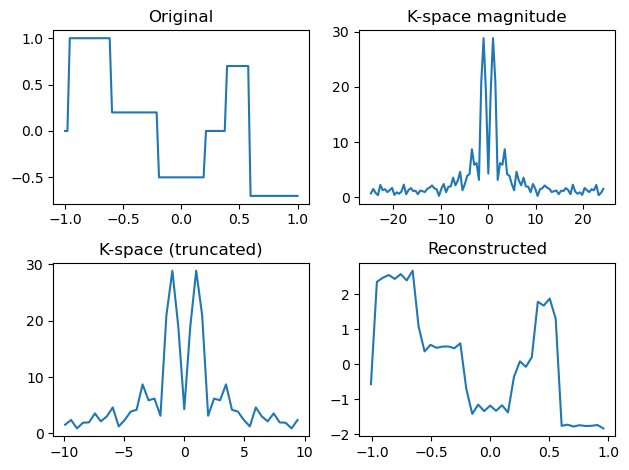

In [5]:
"""Examine effect of reducing k-space FOV (blurring)."""

x, y = step_func_gen(100)
ky, kx = fft_1d(y, x)

# Truncate k-space
kx_trunc = kx[30:-30]
ky_trunc = ky[30:-30]
ry, rx = ifft_1d(ky_trunc, kx_trunc)

plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.title("Original")
plt.subplot(2, 2, 2)
plt.plot(kx, np.abs(ky))
plt.title("K-space magnitude")
plt.subplot(2, 2, 3)
plt.plot(kx_trunc, np.abs(ky_trunc))
plt.title("K-space (truncated)")
plt.subplot(2, 2, 4)
plt.plot(rx, ry)
plt.title("Reconstructed")
plt.tight_layout()
plt.show()

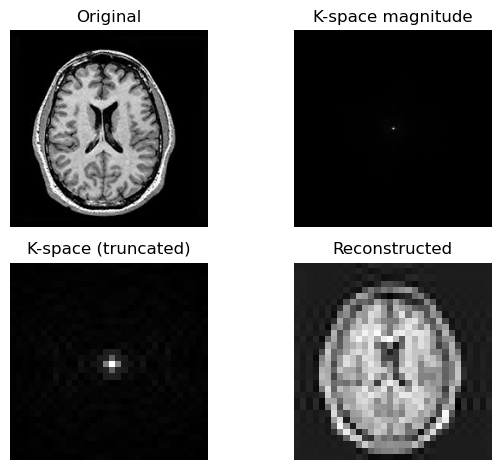

In [6]:
"""Examine effect of reducing 2D k-space FOV (blurring)."""

z = plt.imread("../../data/t1.jpg")[:, :, 0]
z = z / z.max()
z = np.pad(z, ((8, 7), (0, 0)), mode="constant")
kz, kx, ky = fft_2d(z)

# Truncate k-space
kx_trunc = kx[100:-100, 100:-100]
ky_trunc = ky[100:-100, 100:-100]
kz_trunc = kz[100:-100, 100:-100]
rz, rx, ry = ifft_2d(kz_trunc, kx_trunc, ky_trunc)

plt.subplot(2, 2, 1)
plt.imshow(z, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(np.abs(kz), cmap="gray")
plt.title("K-space magnitude")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(np.abs(kz_trunc), cmap="gray")
plt.title("K-space (truncated)")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(rz, cmap="gray")
plt.title("Reconstructed")
plt.axis("off")
plt.tight_layout()
plt.show()

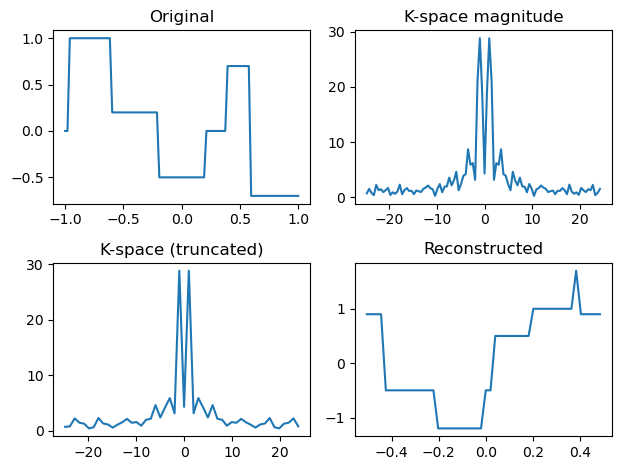

In [7]:
"""Examine effect of down-sampling k-space FOV (aliasing)."""

x, y = step_func_gen(100)
ky, kx = fft_1d(y, x)

# Truncate k-space
kx_trunc = kx[::2]
ky_trunc = ky[::2]
ry, rx = ifft_1d(ky_trunc, kx_trunc)

plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.title("Original")
plt.subplot(2, 2, 2)
plt.plot(kx, np.abs(ky))
plt.title("K-space magnitude")
plt.subplot(2, 2, 3)
plt.plot(kx_trunc, np.abs(ky_trunc))
plt.title("K-space (truncated)")
plt.subplot(2, 2, 4)
plt.plot(rx, ry)
plt.title("Reconstructed")
plt.tight_layout()
plt.show()

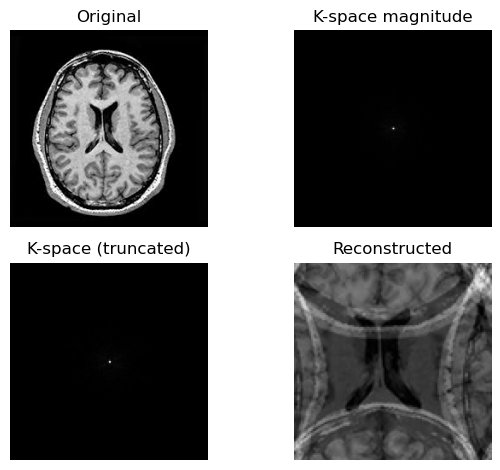

In [8]:
"""Examine effect of down-sampling 2D k-space FOV (aliasing)."""

z = plt.imread("../../data/t1.jpg")[:, :, 0]
z = z / z.max()
z = np.pad(z, ((8, 7), (0, 0)), mode="constant")
kz, kx, ky = fft_2d(z)

# Truncate k-space
kx_trunc = kx[::2, ::2]
ky_trunc = ky[::2, ::2]
kz_trunc = kz[::2, ::2]
rz, rx, ry = ifft_2d(kz_trunc, kx_trunc, ky_trunc)

plt.subplot(2, 2, 1)
plt.imshow(z, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(np.abs(kz), cmap="gray")
plt.title("K-space magnitude")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(np.abs(kz_trunc), cmap="gray")
plt.title("K-space (truncated)")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(rz, cmap="gray")
plt.title("Reconstructed")
plt.axis("off")
plt.tight_layout()
plt.show()